## Neural Networks

### Creating image classifier using neural networks

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.17.0
3.5.0


#### Load the Fashion MNIST dataset from Keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Create the model using the Sequential API

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer(hidden1.name) is hidden1

True

In [12]:
weights, biases = hidden1.get_weights()

In [13]:
weights

array([[ 0.02132411,  0.03657039, -0.05774292, ..., -0.00324395,
        -0.05883848,  0.02580044],
       [ 0.02563734, -0.06724993,  0.02516256, ..., -0.03287431,
        -0.05486884,  0.07008216],
       [ 0.02061331, -0.00577582,  0.05602574, ...,  0.01395348,
        -0.03912337, -0.0619952 ],
       ...,
       [ 0.01813702,  0.06608863, -0.0316261 , ..., -0.06403399,
        -0.05405948, -0.05857508],
       [-0.02434084,  0.03288862, -0.03324289, ...,  0.01834885,
         0.0509599 , -0.0446647 ],
       [ 0.06797203,  0.04383882,  0.07223085, ..., -0.06198711,
         0.04436617, -0.06973015]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

#### Compile the model

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### Train the model

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.6897 - loss: 0.9839 - val_accuracy: 0.8286 - val_loss: 0.5058
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.8251 - loss: 0.5049 - val_accuracy: 0.8462 - val_loss: 0.4485
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.8449 - loss: 0.4461 - val_accuracy: 0.8512 - val_loss: 0.4281
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8526 - loss: 0.4217 - val_accuracy: 0.8658 - val_loss: 0.3923
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8645 - loss: 0.3939 - val_accuracy: 0.8726 - val_loss: 0.3760
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.8674 - loss: 0.3759 - val_accuracy: 0.8622 - val_loss: 0.3875
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8750 - loss: 0.3591 - val_accuracy: 0.8746 - val_loss: 0.3687
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.8753 -

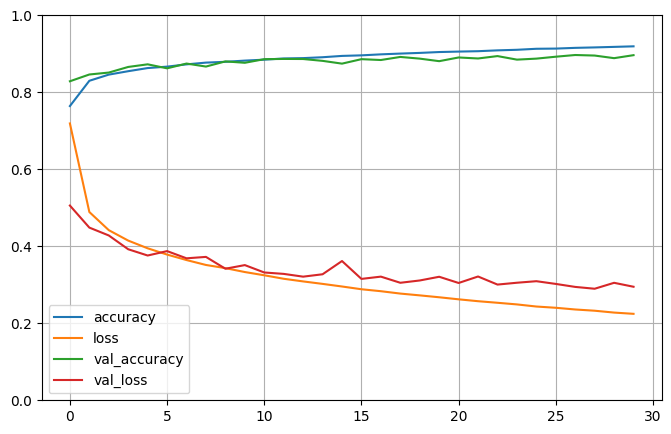

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8482 - loss: 63.5494


[65.15414428710938, 0.8449000120162964]

#### Make predictions

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Predict_classes no longer available in TensorFlow >= 2.6

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

### Building a Regression MLP Using the Sequential API

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
X_train.shape[1:]

(8,)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - loss: 4.0112

C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 1.5785 - val_loss: 0.6360
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.6110 - val_loss: 0.5222
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.4900 - val_loss: 0.4919
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4696 - val_loss: 0.4768
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.4619 - val_loss: 0.4697
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.4498 - val_loss: 0.4547
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.4210 - val_loss: 0.4489
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.4376 - val_loss: 0.4421
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.4298 - val_loss: 0.4307
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.4271 - val_loss: 0.4307
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.4119 - val_loss: 0.4297
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

### Building Complex Models Using the Functional API

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [29]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 1.4120 - val_loss: 0.6890
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.9962 - val_loss: 0.5028
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.4792 - val_loss: 0.4687
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.4480 - val_loss: 0.4488
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.4409 - val_loss: 0.4374
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.7824 - val_loss: 0.4343
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.4169 - val_loss: 0.4194
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.4165 - val_loss: 0.4014
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3720 - val_loss: 0.4542
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.4669 - val_loss: 1.1776
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4813 - val_loss: 0.4118
Epoch 12/20
363/363 ━━━━━━━━━━

In [30]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### Multiple inputs

In [31]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [32]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.01))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [33]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 1.7466 - val_loss: 0.5724
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.6114 - val_loss: 0.5123
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.6059 - val_loss: 0.5062
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.5555 - val_loss: 0.4966
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.5026 - val_loss: 0.5047
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4587 - val_loss: 0.4524
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.4579 - val_loss: 0.4464
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.4841 - val_loss: 0.4352
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.4334 - val_loss: 0.4232
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.3896 - val_loss: 0.4149
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.4246 - val_loss: 0.4102
Epoch 12/20
363/363 ━━━━━━━━━━

In [34]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 30)        │        930 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,178 (4.61 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [36]:
y_pred

array([[1.2811526],
       [2.524687 ],
       [1.935304 ]], dtype=float32)

#### Multiple outputs

In [40]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [41]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [42]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - aux_output_loss: 0.2737 - loss: 1.8421 - main_output_loss: 1.5684 - val_aux_output_loss: 0.1109 - val_loss: 0.6079 - val_main_output_loss: 0.4969
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - aux_output_loss: 0.1047 - loss: 0.5926 - main_output_loss: 0.4879 - val_aux_output_loss: 0.0907 - val_loss: 0.5457 - val_main_output_loss: 0.4549
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - aux_output_loss: 0.0852 - loss: 0.5327 - main_output_loss: 0.4475 - val_aux_output_loss: 0.0809 - val_loss: 0.5109 - val_main_output_loss: 0.4300
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - aux_output_loss: 0.0801 - loss: 0.5135 - main_output_loss: 0.4334 - val_aux_output_loss: 0.0743 - val_loss: 0.4979 - val_main_output_loss: 0.4236
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - aux_output_loss: 0.0714 - loss: 0.4759 - main_output_loss: 0.4044 - val_aux_output_loss: 0.0692 - val_loss: 0.4953 - val_main_output_los

In [43]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - aux_output_loss: 0.0506 - loss: 0.3734 - main_output_loss: 0.3228


In [45]:
total_loss, main_loss, aux_loss

(0.376895546913147, 0.3263353705406189, 0.05060337111353874)

In [44]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [46]:
y_pred_main, y_pred_aux

(array([[1.3059382],
        [2.6325188],
        [2.1316214]], dtype=float32),
 array([[1.0792636],
        [2.4484568],
        [2.0008779]], dtype=float32))

In [47]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,209 (4.73 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### Creating dynamic models using the Subclassing API

In [49]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [50]:
model = WideAndDeepModel()

### Saving and restoring a model

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.001))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 3.3588 - val_loss: 1.1470
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 1.0663 - val_loss: 0.8015
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.7481 - val_loss: 0.6815
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.6708 - val_loss: 0.6346
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.6229 - val_loss: 0.6069
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.5916 - val_loss: 0.5853
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.5651 - val_loss: 0.5683
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.5527 - val_loss: 0.5535
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.5411 - val_loss: 0.5407
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.5305 - val_loss: 0.5297


In [61]:
model.save("my_keras_model.keras")

In [62]:
model = keras.models.load_model("my_keras_model.keras")

Problem with loading model when compiling with learning_rate=1e-3. You can load and then compile or compile with learning_rate=0.001 instead.

In [59]:
model = keras.models.load_model("my_keras_model.keras", compile=False)
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#### Using callbacks

In [64]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.5211 - val_loss: 0.5195
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5199 - val_loss: 0.5105
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.4871 - val_loss: 0.5024
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.4804 - val_loss: 0.4951
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.4858 - val_loss: 0.4885
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.4696 - val_loss: 0.4831
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.4384 - val_loss: 0.4772
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.4445 - val_loss: 0.4726
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.4439 - val_loss: 0.4684
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4415 - val_loss: 0.4639


#### Early stopping

In [65]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.keras") #going back to best model

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.4632 - val_loss: 0.4602
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.4596 - val_loss: 0.4568
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.4442 - val_loss: 0.4539
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4415 - val_loss: 0.4511
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.4371 - val_loss: 0.4485
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.4273 - val_loss: 0.4461
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.4505 - val_loss: 0.4435
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.4228 - val_loss: 0.4418
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.4213 - val_loss: 0.4398
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.4311 - val_loss: 0.4381


In [66]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.4165 - val_loss: 0.4361
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.4123 - val_loss: 0.4341
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.4112 - val_loss: 0.4327
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.4129 - val_loss: 0.4318
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.4104 - val_loss: 0.4295
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.4261 - val_loss: 0.4284
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.4229 - val_loss: 0.4268
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.4207 - val_loss: 0.4255
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.4076 - val_loss: 0.4246
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.4005 - val_loss: 0.4230
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.4017 - val_loss: 0.4219
Epoch 12/100
363/36

#### Custom callbacks

In [67]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### Using TensorBoard for Visualization

In [68]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.001))

In [71]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 2.4041 - val_loss: 0.9555
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.8959 - val_loss: 0.8074
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.7792 - val_loss: 0.7280
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.6841 - val_loss: 0.6830
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.6356 - val_loss: 0.6507
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.6406 - val_loss: 0.6259
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.6089 - val_loss: 0.6068
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.5930 - val_loss: 0.5915
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.5689 - val_loss: 0.5764
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.5535 - val_loss: 0.5618
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.5590 - val_loss: 0.5560
Epoch 12/30
363/363 ━━━━━━━━━━

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [72]:
import numpy as np

test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

In [89]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(8,)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(8,))

In [91]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 2.3652 - val_loss: 0.7338
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.7355 - val_loss: 0.6492
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.6053 - val_loss: 0.5955
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5754 - val_loss: 0.5586
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.5341 - val_loss: 0.5326
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.5253 - val_loss: 0.5145
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.5019 - val_loss: 0.5014
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4665 - val_loss: 0.4927
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.4774 - val_loss: 0.4849
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.4804 - val_loss: 0.4791
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.4566 - val_loss: 0.4735
Epoch 12/100
363/36

KerasRegressor(
	model=<function build_model at 0x0000021C8EEF0B80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=1
	n_neurons=30
	learning_rate=0.003
	input_shape=(8,)
)

In [92]:
mse_test = keras_reg.score(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [93]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.4293 - val_loss: 0.6937
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 3.5328 - val_loss: 0.5142
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.4704 - val_loss: 0.4496
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.4018 - val_loss: 0.4053
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.4077 - val_loss: 0.3911
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.3523 - val_loss: 0.3754
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.3546 - val_loss: 0.3744
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.3420 - val_loss: 0.3678
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.3355 - val_loss: 0.3734
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.3526 - val_loss: 0.3606
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3234 - val_loss: 0.3641
Epoch 12/100
242/24

C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\scikeras\wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 2.6962 - val_loss: 0.6584
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.7397 - val_loss: 0.5994
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.5828 - val_loss: 0.5625
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.5450 - val_loss: 0.6040
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5604 - val_loss: 0.6349
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.5654 - val_loss: 0.5605
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.5827 - val_loss: 0.5662
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5300 - val_loss: 0.5411
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.5383 - val_loss: 0.7789
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.6260 - val_loss: 1.1075
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.6330 - val_loss: 0.5436
Epoch 12/100
242/242 ━━━━━━━━━━

C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [ 7.78216742e-01  5.86569196e-01  7.36566012e-01  7.05440766e-01
  5.92653998e-01             nan -3.51905894e+42  6.92226643e-01
  7.41756972e-01  5.82444643e-01]
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 1.2221 - val_loss: 0.5722
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.5092 - val_loss: 0.4597
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.4286 - val_loss: 0.4384
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.4192 - val_loss: 0.4314
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.4041 - val_loss: 0.4292
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.3802 - val_loss: 0.4081
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.3943 - val_loss: 0.4050
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.3667 - val_loss: 0.3913
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.3772 - val_loss: 0.3831
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.3853 - val_loss: 0.3765
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.3617 - val_loss: 0.3722
Epoch 12/100
363/363 ━━━━━━━━━━

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(input_shape=(8,), learning_rate=0.003, model=<function build_model at 0x0000021C8EEF0B80>, n_hidden=1, n_neurons=30),
                   param_distributions={'learning_rate': [0.02649399056877689,
                                                          0.007168487740858249,
                                                          0.0003029571906483829,
                                                          0.0032450056481498797,
                                                          0.002316242867200746,
                                                          0.0008318287461111042,
                                                          0.001452402258287918,
                                                          0.00...
                                                          0.0020128373565954775,
                                                          0.0037753471087948356,
                                                          0.0003413560451613117,
                                                          0.0012524609401976829,
                                                          0.004486838978240833,
                                                          0.0020723493799688656,
                                                          0.012313496441782201,
                                                          0.0016327560956401043,
                                                          0.005455640287336193,
                                                          0.008468217748216754,
                                                          0.0013252948130273116, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]})

In [94]:
rnd_search_cv.best_params_

{'n_neurons': 99, 'n_hidden': 2, 'learning_rate': 0.010095727083442635}

In [95]:
rnd_search_cv.best_score_

0.7782167415888589

In [97]:
model = rnd_search_cv.best_estimator_.model

In [96]:
model.save("my_best_model.keras")